# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [3]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [124]:
#function to get elucidean distance 
def distance_matrix(A, B):
    M = A.shape[0]
    N = B.shape[0]
   
    A_dots = (A*A).sum(axis=1).reshape((M,1))*np.ones(shape=(1,N))
    B_dots = (B*B).sum(axis=1)*np.ones(shape=(M,1))
    D_squared =  A_dots + B_dots -2*A.dot(B.T)
    return D_squared



def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type):
## write code here for the Distance function here # 
# if you want elucidian distance so Distance_Type is 1
# if you want pearson correlation distance so Distance_Type is 2
 if (Distance_Type==1):
  print('hello 25')
  Cluster_Distance =distance_matrix(Cluster_Centroids, Data_points)
  print(distance_matrix)   
 else:
   #calculate the pearson correlation distance
   #initializing a new matrix to store cluster distance in 
  Cluster_Distance=np.zeros([Data_points.shape[0],Cluster_Centroids.shape[0]])
  counterA=0
  counterB=0
  for rowb in Cluster_Centroids:
    #calculating the distance for each cluster centroid
    for rowa in Data_points:
      #calculating the distance for each point 
        cc=np.corrcoef(rowb,rowa)
        #extracting the pearson correlation distnace between the centroid and the data point from the correlation matrix
        #and inserting it in the cluster distance matrix to be in the required format of rows and columns
        Cluster_Distance[counterA][counterB]=1-cc[0][1]
        counterA=counterA+1
    counterB = counterB + 1
    counterA=0 
  return Cluster_Distance 


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [107]:
def areSame(A,B,N):
     
    for i in range(N):
        for j in range(N):
            if (A[i][j] != B[i][j]):
                return 0
    return 1


In [123]:
from random import seed
from random import randint
seed(1)
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here
       #initializing empty cluster centroids matrix 
       #creating array of arrays that store the location of all datapoints and their corresponding cluster each inner array represent data points in same cluster
       Clusterdatapoints_pointer=[]
       Cluster=np.zeros([Number_of_Clusters,Data_points.shape[1]]) 
       for i in range(Number_of_Clusters):
         #choosing random cluster centroids from the available data points 
         value1= randint(0,Data_points.shape[0])
         Cluster[i]=Data_points[value1]
       # write your loop 
       # initializing cluster mean 
       Clustermean=np.ones([Number_of_Clusters,Data_points.shape[1]]) 
       #this counter is just acting as a flag 
       counter=1
       #initializing the Variable Final_Cluster_Distance (with any value)
       Final_Cluster_Distance=GUC_Distance(Data_points,Cluster,Distance_Type)
       #initializing the Variable Cluster_Metric (with any value)
       Cluster_Metric=0
       #checking the new cluster mean is equal to the current centroid or not to terminate the loop
       print(Cluster)
       print(Clustermean)

       while (areSame(Clustermean, Cluster, Number_of_Clusters)!=1):
         #the first time it wont update the cluster with the cluster mean since cluster mean is not yet calculated
         if (counter!=1):
           #update the cluster with the new cluster mean 
          Cluster=Clustermean
         counter=counter+1 
         #creating a matrix that summs all the points from the same cluster and place them in the corresponding column
         Clustersummation=np.zeros([Number_of_Clusters,Data_points.shape[1]])
         #creating a matrix that counts the number of elements in each cluster and place that count in the corresponding column
         Clustercounter=np.zeros(Number_of_Clusters)
         #creating array of arrays that store the location of all datapoints and their corresponding cluster each inner array represent data points in same cluster
         Clusterdatapoints_pointer=[]
         #initiailzing this array of arrays 
         for  i in range(Number_of_Clusters):
           Clusterdatapoints_pointer.append([])
         #calculating distance between cluster centroids and data points
         Final_Cluster_Distance=GUC_Distance(Data_points,Cluster,Distance_Type)
         print(Final_Cluster_Distance)
         print('hello')
         for i in range(Final_Cluster_Distance.shape[0]):
          #for each data point locate the lowest distance to a centroid belongs to which cluster 
          z=np.argmin(Final_Cluster_Distance[i], axis=1)
          #sum this point to the other points in this cluster 
          Clustersummation[z]=Clustersummation[z]+Data_points[i]
          #save the location of the data point in the right column that represents the cluster it belong to
          Clusterdatapoints_pointer[z].append(i)
          print('hello')
          #increment the counter of each cluster repectively 
          Clustercounter[z]=Clustercounter[z]+1
          #calculate the cluster mean 
         Clustermean=Clustersummation/Clustercounter    
         Cluster_Metric=0
    
       return [ Final_Cluster_Distance , Cluster_Metric ,Cluster ,Clusterdatapoints_pointer] 





In [125]:
GUC_Kmean (X, 2, 1 )

hello 25
<function distance_matrix at 0x7f2139672290>
[[-3.98150865 -2.53789653]
 [ 4.02257043  5.43975241]]
[[1. 1.]
 [1. 1.]]
hello 25
<function distance_matrix at 0x7f2139672290>
None
hello


AttributeError: ignored

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [8]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [9]:
# Function to print all distinct combinations of length `k` to find unique dimension combination
# the A is your array of dimensions 
# the k is 2 since we are looking to find all unique 2dimensions of a multiple dimension data
def getDistinctCombinations(A, k):
    subarrays = set()
    findCombinations(A, len(A), k, subarrays)
    return subarrays


In [10]:
def findCombinations(A, n, k, subarrays, out=()):
 
    # invalid input
    if len(A) == 0 or k > n:
        return
 
    # base case: combination size is `k`
    if k == 0:
        subarrays.add(out)
        return
 
    # start from the next index till the first index
    for i in reversed(range(n)):
        # add current element `A[i]` to the output and recur for next index
        # `i-1` with one less element `k-1`
        findCombinations(A, i, k - 1, subarrays, (A[i],) + out)
 



In [77]:
import math
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,Cluster=[],Clusterdatapoints_pointer=[],km=[],num_clusters=0):
  #incase it is 2 dimension
  if (X.shape[1]==2):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
       plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
       for i in range(num_clusters):
           for z in range(len(Clusterdatapoints_pointer[i])):
             plt.scatter(X[Clusterdatapoints_pointer[i][z]][0],X[Clusterdatapoints_pointer[i][z]][1],c = color[i],alpha = alpha,s=s)
             #drawing the cluster centroids in every unique 2 dimensions in multidimension.
           plt.scatter(Cluster[i][0],Cluster[i][1],c = color[i], marker = 'x', s = 100)
             #just to draw them in a grid shape order we use those counters

  #incase it is more than 2 dimensions
  else:
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    #creating a list with dimensions as numbers from 0 to the max number of dimension as these dimensions would be indexed in data 
    A = list(range(0, X.shape[1]))     
    #finding the 2 dimension unique combinations we can get from them and store them in a set
    subarrays=getDistinctCombinations(A, 2)     
    #finding the number of these unique combination to know the number of sub 2d plots we need to draw 
    Q=len(subarrays)
    #initializing the subplots 
    figure, axes = plt.subplots(nrows=int(math.ceil(Q/2)), ncols=2)
 
    #if there is no clusters
    if num_clusters == 0:
      counter1=0
      counter2=0
      for i in subarrays:
       #drawing every unique 2 dimensions in multidimension. 
       axes[counter1, counter2].scatter(X[:,int(i[0])],X[:,int(i[1])],c = color[0],alpha = alpha,s = s)
       #just to draw them in a grid shape order we use those counters
       if (counter1 <(Q/2)-1):
        counter1=counter1+1
       else:
        counter2=1
        counter1=0
      figure.tight_layout()

    #if there is clusters
    else:   
     for j in subarrays: 
     #drawing for all unique 2 dimension in multidimesnion
       for i in range(num_clusters):
       #drawing all clusters  
       #drawing all the points that belong to the current cluster in every unique 2 dimensions in multidimension.
        for z in range(len(Clusterdatapoints_pointer[i])):
         axes[counter1, counter2].scatter(X[Clusterdatapoints_pointer[i][z]][j[0]],X[Clusterdatapoints_pointer[i][z]][j[1]],c = color[i],alpha = alpha,s=s)
         #drawing the cluster centroids in every unique 2 dimensions in multidimension.
        axes[counter1, counter2].scatter(Cluster[i][j[0]],Cluster[i][j[1]],c = color[i], marker = 'x', s = 100)
         #just to draw them in a grid shape order we use those counters
       if (counter1 <(Q/2)-1):
        counter1=counter1+1
       else:
        counter2=1
        counter1=0
     figure.tight_layout()

  

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

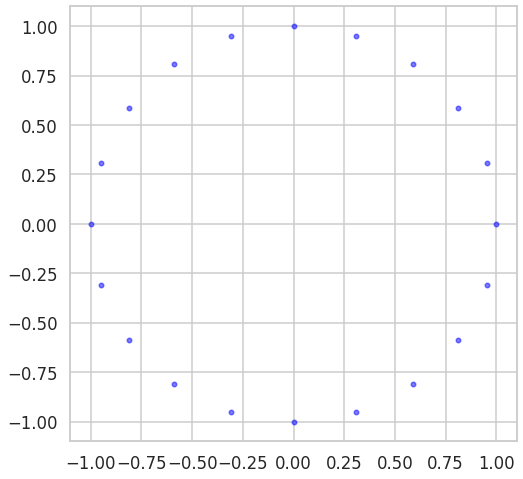

In [82]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)


> #### 2.3. Example 2 : Multi blob Data Gen and display 

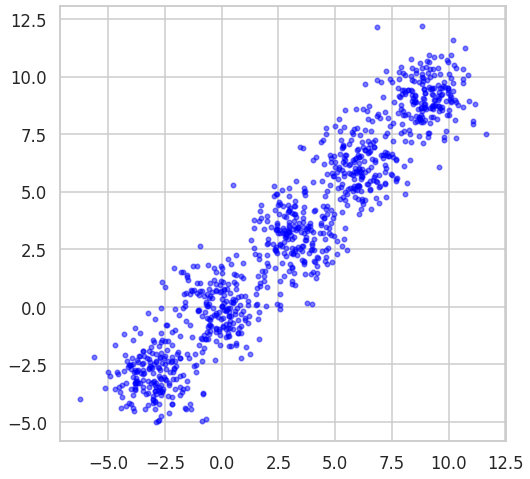

In [88]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

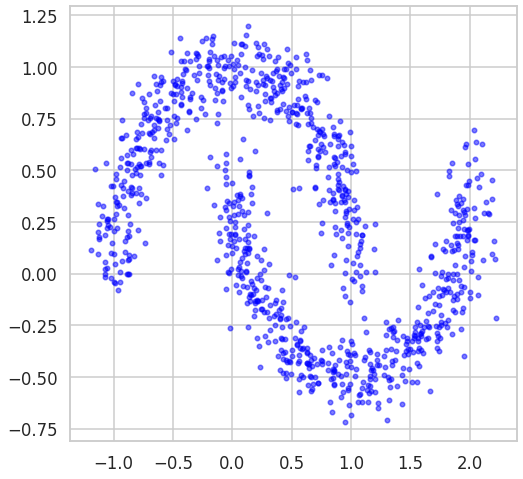

In [74]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [81]:
[ Final_Cluster_Distance , Cluster_Metric ,Cluster ,Clusterdatapoints_pointer]=GUC_Kmean ( X, 2, 1 )
#print(Clusterdatapoints_pointer)
# display_cluster(X,Cluster,Clusterdatapoints_pointer,km=[],num_clusters=2)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 